In [152]:
import pandas as pd
import numpy as np
from deepplot import ROC_threshold, Roc_Auc_Plot, classification_evaluation

In [153]:
# train_df = pd.read_csv('./data1/train_results.csv')
radiocli_test_df = pd.read_csv('./data1/test_results.csv')
# extest_df = pd.read_csv('./data1/extest_results.csv')
cli_test_df = pd.read_csv('./data2/train_results.csv')
radio_test_df = pd.read_csv('test_radio.csv')
#radio_test_df = radio_test_df[radio_test_df['dataset']=='test']
# radio_test_df = 
print("1 2 3", len(radiocli_test_df), "  ", len(cli_test_df), " ", len(radio_test_df))

1 2 3 70    158   70


In [154]:
radiocli_y_score = radiocli_test_df['test_pred']
radiocli_y_true = radiocli_test_df['test_label']
radiocli_thre = ROC_threshold(radiocli_y_true, radiocli_y_score)[0]
print(radiocli_thre)

0.807553572294638


In [155]:
cli_test_df.head(2)
# radio_test_df.head(2)

,Unnamed: 0,train_pid,train_label,train_pred
0,1,1,0,0.155026
1,2,2,1,0.902084


In [90]:
cli_y_score = np.array(cli_test_df['train_pred'])
cli_y_true = cli_test_df['train_label']
cli_thre = ROC_threshold(cli_y_true, cli_y_score)[0]
print(test_thre)

(0.5592936913406085, [0.4166666666666667, 0.8043478260869565])


In [91]:
radio_y_score = np.array(radio_test_df['y_score'])
radio_y_true = radio_test_df['y_true']
radio_thre = ROC_threshold(radio_y_true, radio_y_score)[0]
radio_thre = 0.80755
print(test_thre)

(0.5592936913406085, [0.4166666666666667, 0.8043478260869565])


In [92]:
radiocli_y_pred = radiocli_y_score > radiocli_thre
cli_y_pred = cli_y_score > cli_thre
radio_y_pred = radio_y_score > radio_thre 

In [93]:
radiocli_results = pd.DataFrame({'y_true':radiocli_y_true, 'y_pred':radiocli_y_pred, 'y_score':radiocli_y_score})
cli_results = pd.DataFrame({'y_true':cli_y_true, 'y_pred':cli_y_pred, 'y_score':cli_y_score})
radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})
cli_results.head()

,y_true,y_pred,y_score
0,0,False,0.155026
1,1,True,0.902084
2,1,False,0.347054
3,0,True,0.612407
4,1,True,0.902084


In [94]:
radiocli_results.to_csv('./out_data1/test_radiocli.csv',index=0)
cli_results.to_csv('./out_data1/test_cli.csv',index=0)
radio_results.to_csv('./out_data1/test_radio.csv',index=0)
results_list = ['./out_data1/test_radio.csv','./out_data1/test_cli.csv', './out_data1/test_radiocli.csv']

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

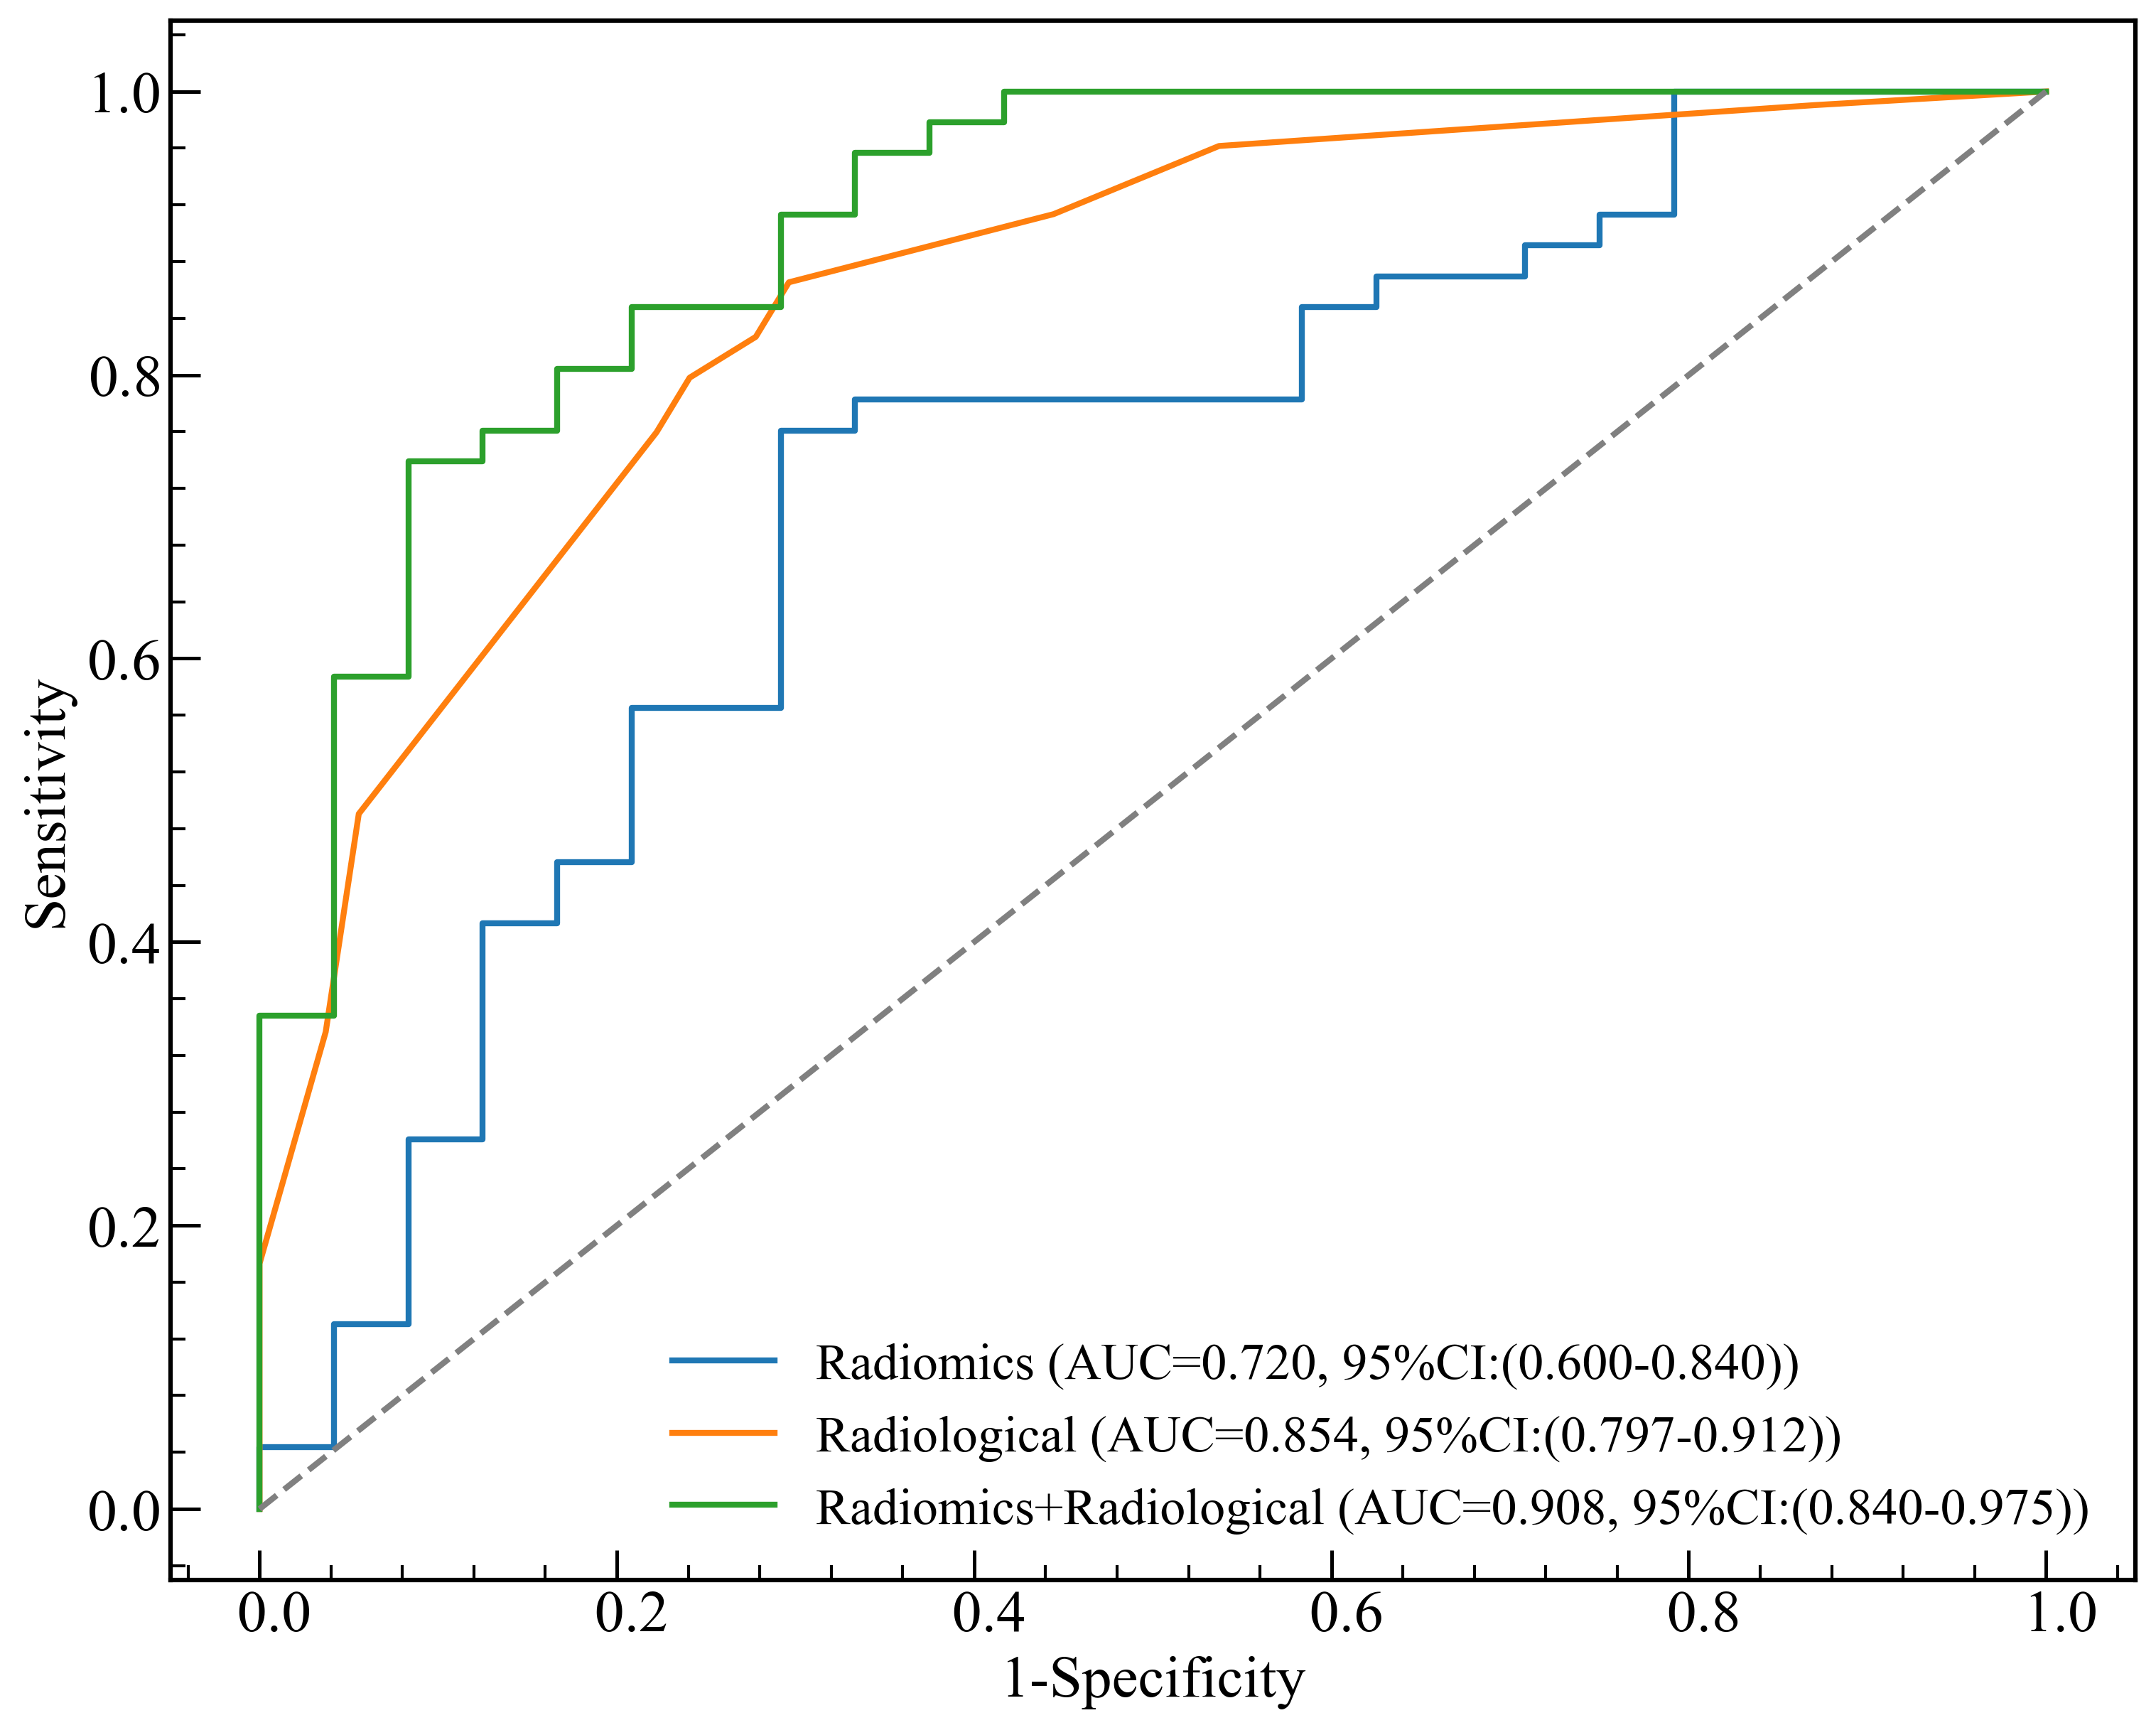

In [95]:
Roc_Auc_Plot(results_list, legends=['Radiomics', 'Radiological', 'Radiomics+Radiological'], saved='test_dataset_results.png')

In [96]:
print(extest_y_score)
print(np.array(extest_y_true))
print({x:y for x, y in zip(extest_y_score,np.array(extest_y_true))})

NameError: name 'extest_y_score' is not defined

In [97]:
classification_evaluation(extest_y_true, extest_y_pred, extest_y_score)

NameError: name 'extest_y_true' is not defined

In [98]:
classification_evaluation(train_y_true, train_y_pred, train_y_score)

NameError: name 'train_y_true' is not defined

In [99]:
classification_evaluation(test_y_true, test_y_pred, test_y_score)

NameError: name 'test_y_pred' is not defined

In [100]:
exr_df = pd.read_csv('../manuscript_back_modify_20230104/external_cliradio.csv')
exr_df = exr_df[['label','radiomics_score']]
exr_df.rename(columns={'radiomics_score':'y_score'}, inplace=True)
exr_df.head()

,label,y_score
0,1,0.730589
1,0,0.377057
2,0,0.649151
3,1,0.608155
4,1,0.615327


In [101]:
radio_y_score = np.array(exr_df['y_score'])
radio_y_true = exr_df['label']
radio_thre = ROC_threshold(test_y_true, test_y_score)[0]
print(radio_thre)

0.51685315972792


In [102]:
print(radio_thre)
radio_y_pred = radio_y_score > 0.6
radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})

0.51685315972792


In [103]:
print(len(radio_y_pred))
classification_evaluation(radio_y_true, radio_y_pred, radio_y_score)

45


{'auc': 0.7469635627530364,
 'auc_CI': [0.60482752471476, 0.8890996007913129],
 'sensitivity(recall)': 0.6923076923076923,
 'specificity': 0.6842105263157895,
 'accuracy': 0.6888888888888889,
 'precision': 0.75,
 'f1': 0.7199999999999999}

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

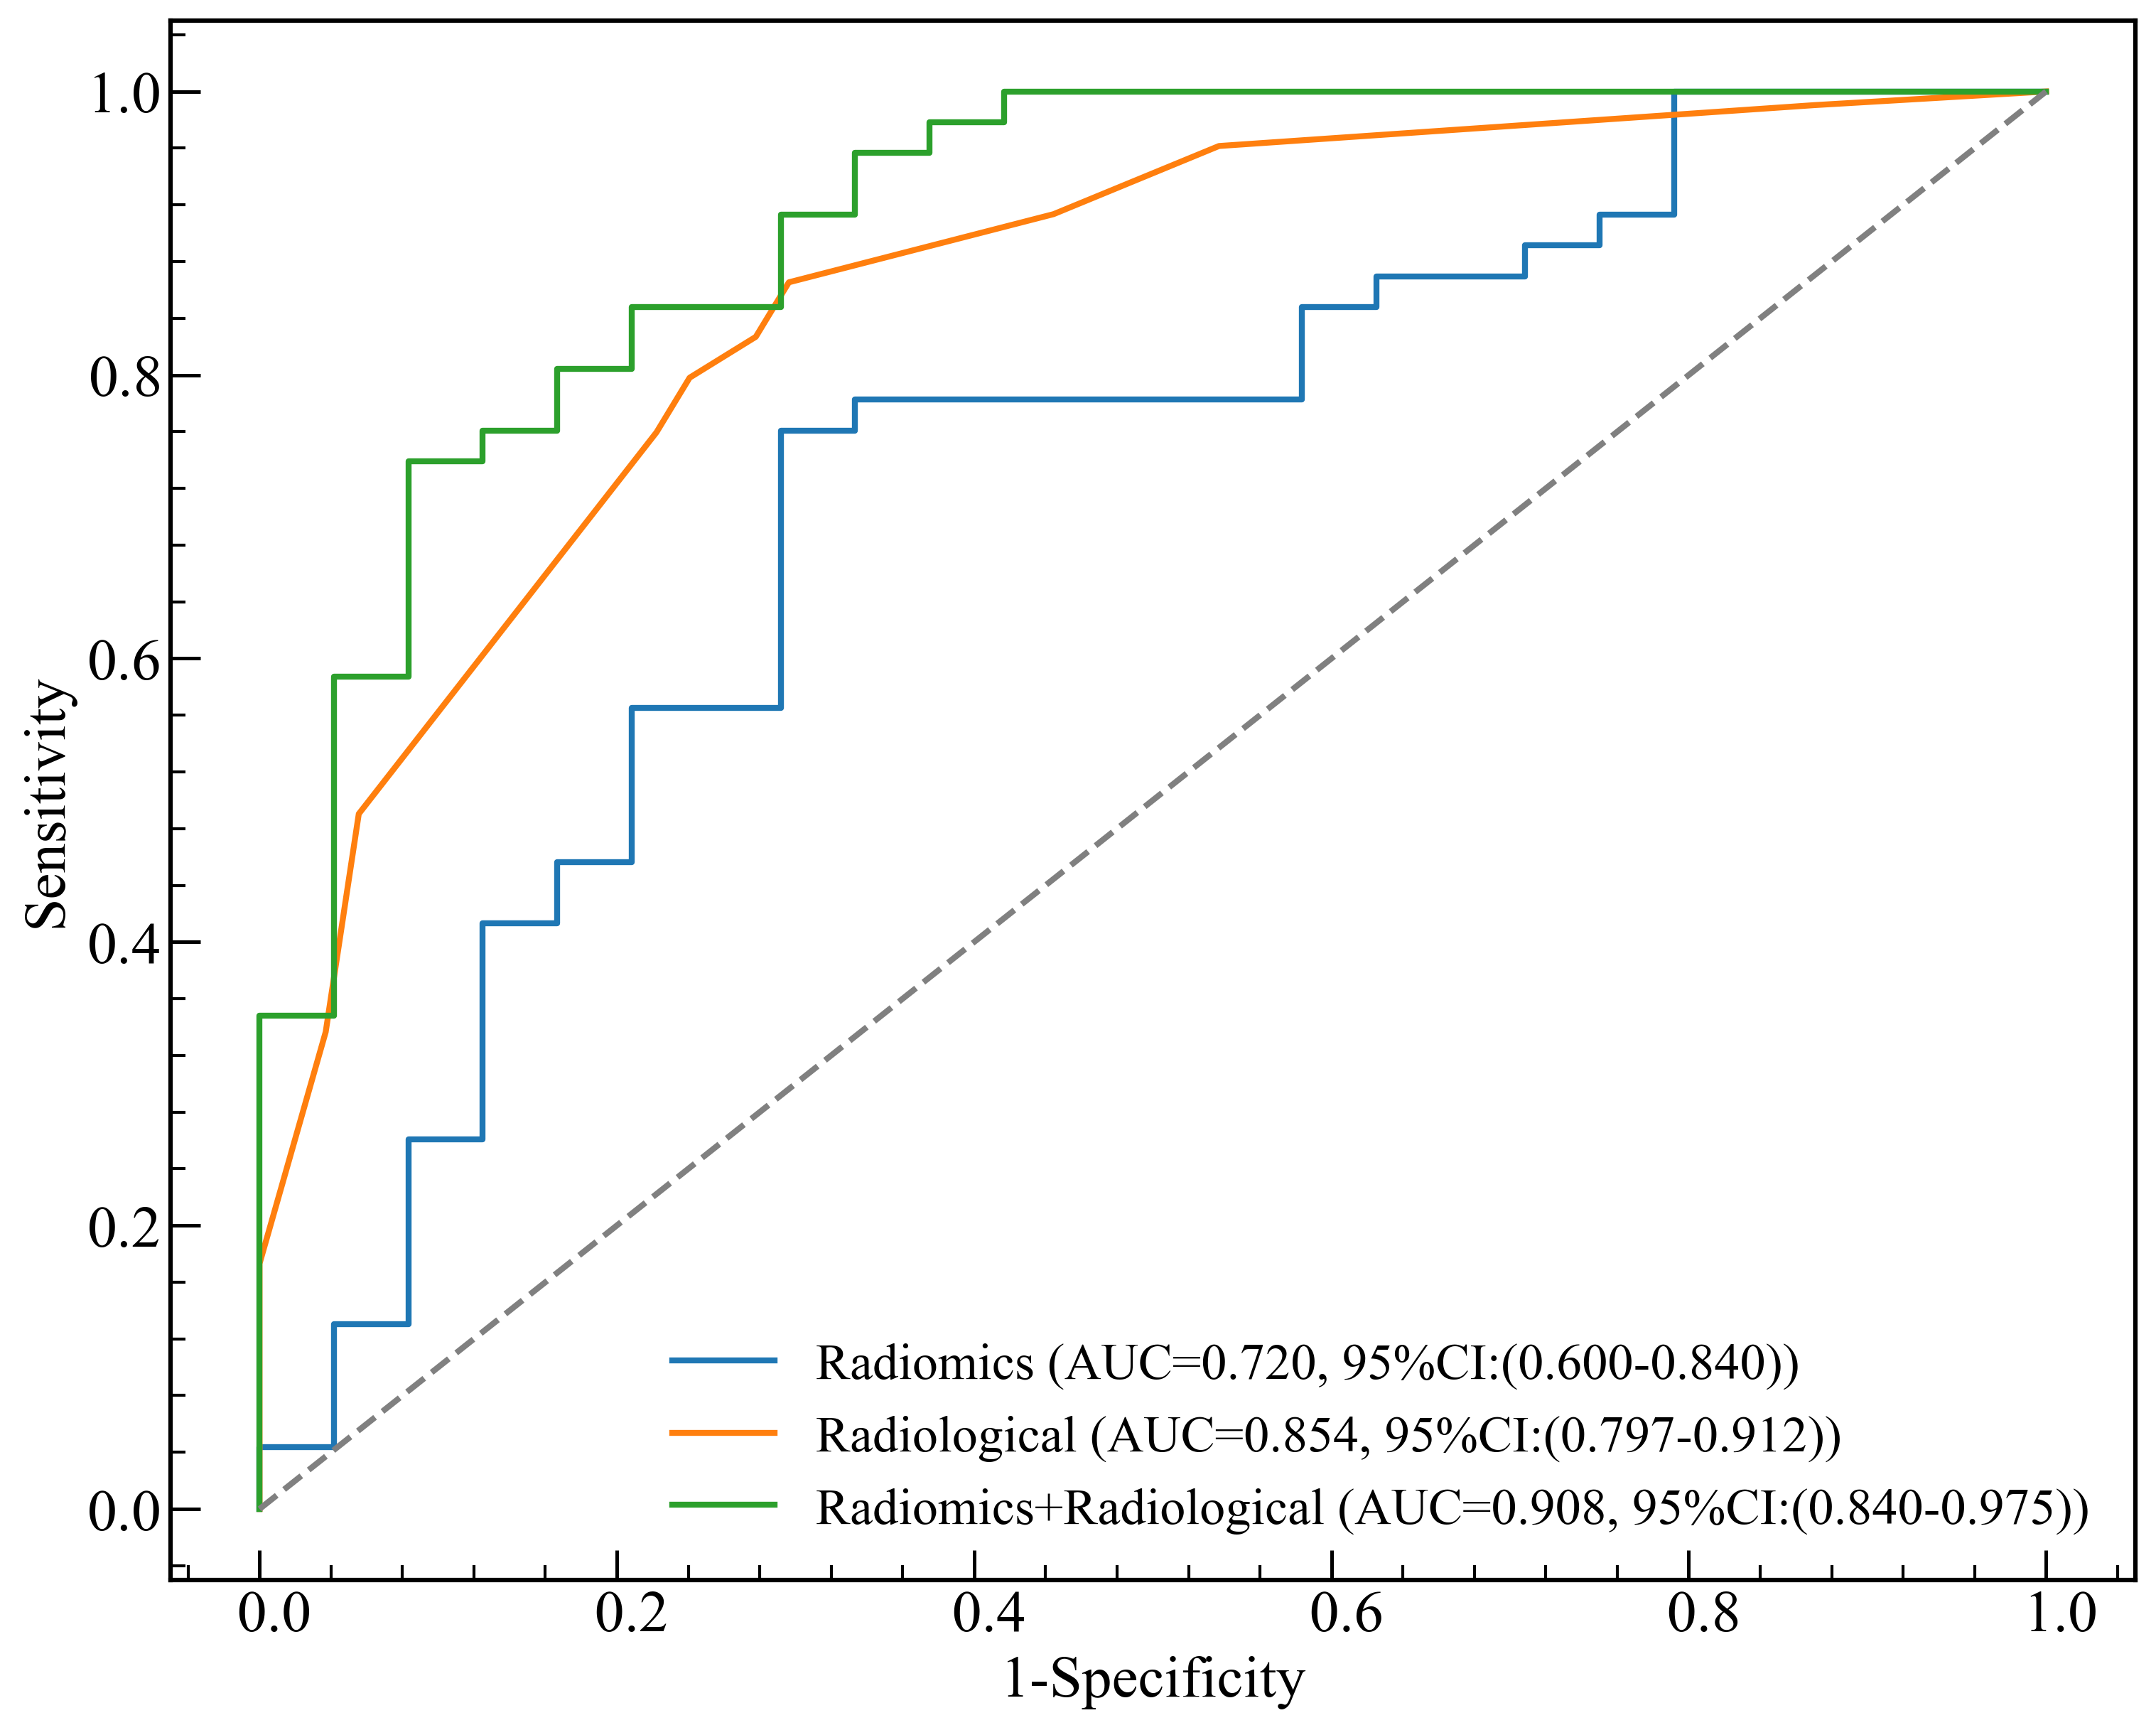

In [104]:
Roc_Auc_Plot(results_list, legends=['Radiomics', 'Radiological', 'Radiomics+Radiological'], saved='test_dataset_results.png')

## External Radiomics

In [115]:
exr_df = pd.read_csv('../manuscript_back_modify_20230104/external_cliradio.csv')
exr_df = exr_df[['label','radiomics_score']]
exr_df.rename(columns={'radiomics_score':'y_score'}, inplace=True)
exr_df.head()

,label,y_score
0,1,0.730589
1,0,0.377057
2,0,0.649151
3,1,0.608155
4,1,0.615327


In [116]:
radio_y_score = np.array(exr_df['y_score'])
radio_y_true = exr_df['label']
radio_thre = ROC_threshold(test_y_true, test_y_score)[0]
print(radio_thre)

0.51685315972792


In [117]:
print(radio_thre)
radio_y_pred = radio_y_score > 0.6
radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})

0.51685315972792


In [118]:
print(len(radio_y_pred))
classification_evaluation(radio_y_true, radio_y_pred, radio_y_score)

45


{'auc': 0.7469635627530364,
 'auc_CI': [0.60482752471476, 0.8890996007913129],
 'sensitivity(recall)': 0.6923076923076923,
 'specificity': 0.6842105263157895,
 'accuracy': 0.6888888888888889,
 'precision': 0.75,
 'f1': 0.7199999999999999}

## Radiological

In [119]:
cli_train_df = pd.read_csv('./data2/train_results.csv')
cli_test_df = pd.read_csv('./data2/test_results.csv')
cli_extest_df = pd.read_csv('./data2/extest_results.csv')

In [121]:
train_y_score = cli_train_df['train_pred']
train_y_true = cli_train_df['train_label']
train_thre = ROC_threshold(train_y_true, train_y_score)[0]
print(train_thre)

0.51685315972792


In [122]:
extest_y_score = np.array(cli_extest_df['extest_pred'])
extest_y_true = cli_extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)[0]
print(extest_thre)

0.452291774883668


In [124]:
extest_y_pred = extest_y_score > train_thre 

In [126]:
cli_extest_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})

In [127]:
cli_extest_results.to_csv('./out_data2/external_clinical.csv',index=0)

## External Radiomics+radiological

In [156]:
exr_df = pd.read_csv('./data1/extest_results.csv')
# exr_df = exr_df[['label','radiomics_score']]
# exr_df.rename(columns={'radiomics_score':'y_score'}, inplace=True)
exr_df.head()

,Unnamed: 0,extest_pid,extest_label,extest_pred
0,1,w1,1,0.651646
1,2,w2,0,0.028857
2,3,w3,0,0.278621
3,4,w4,1,0.920497
4,5,w5,1,0.969395


In [157]:
radiocli_extest_score = exr_df['extest_pred']
radiocli_extest_true = exr_df['extest_label']
extest_radiocli_thre = ROC_threshold(radiocli_extest_true, radiocli_extest_score)[0]
print(radiocli_thre)

0.807553572294638


In [165]:
radiocli_extest_pred = radiocli_extest_score > 0.68
radiocli_extest_results= pd.DataFrame({'y_true':radiocli_extest_true, 'y_pred':radiocli_extest_pred, 'y_score':radiocli_extest_score})
radiocli_extest_results.to_csv('./out_data2/external_cliradio.csv',index=0)

In [166]:
print(len(radio_y_pred))
classification_evaluation(radiocli_extest_true, radiocli_extest_pred, radiocli_extest_score)

45


{'auc': 0.8542510121457491,
 'auc_CI': [0.7443580450180285, 0.9641439792734696],
 'sensitivity(recall)': 0.7692307692307693,
 'specificity': 0.7368421052631579,
 'accuracy': 0.7555555555555555,
 'precision': 0.8,
 'f1': 0.7843137254901961}

## External results

In [167]:
external_radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})
# external_clinical_results = pd.DataFrame({'y_true':test_y_true, 'y_pred':test_y_pred, 'y_score':test_y_score})
external_cliradio_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})

In [168]:
external_radio_results.to_csv('./out_data2/external_radio.csv',index=0)
# external_clinical_results.to_csv('./out_data2/external_clinical.csv',index=0)
# external_cliradio_results.to_csv('./out_data2/external_cliradio.csv',index=0)
external_results_list = ['./out_data2/external_radio.csv','./out_data2/external_clinical.csv', './out_data2/external_cliradio.csv']

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

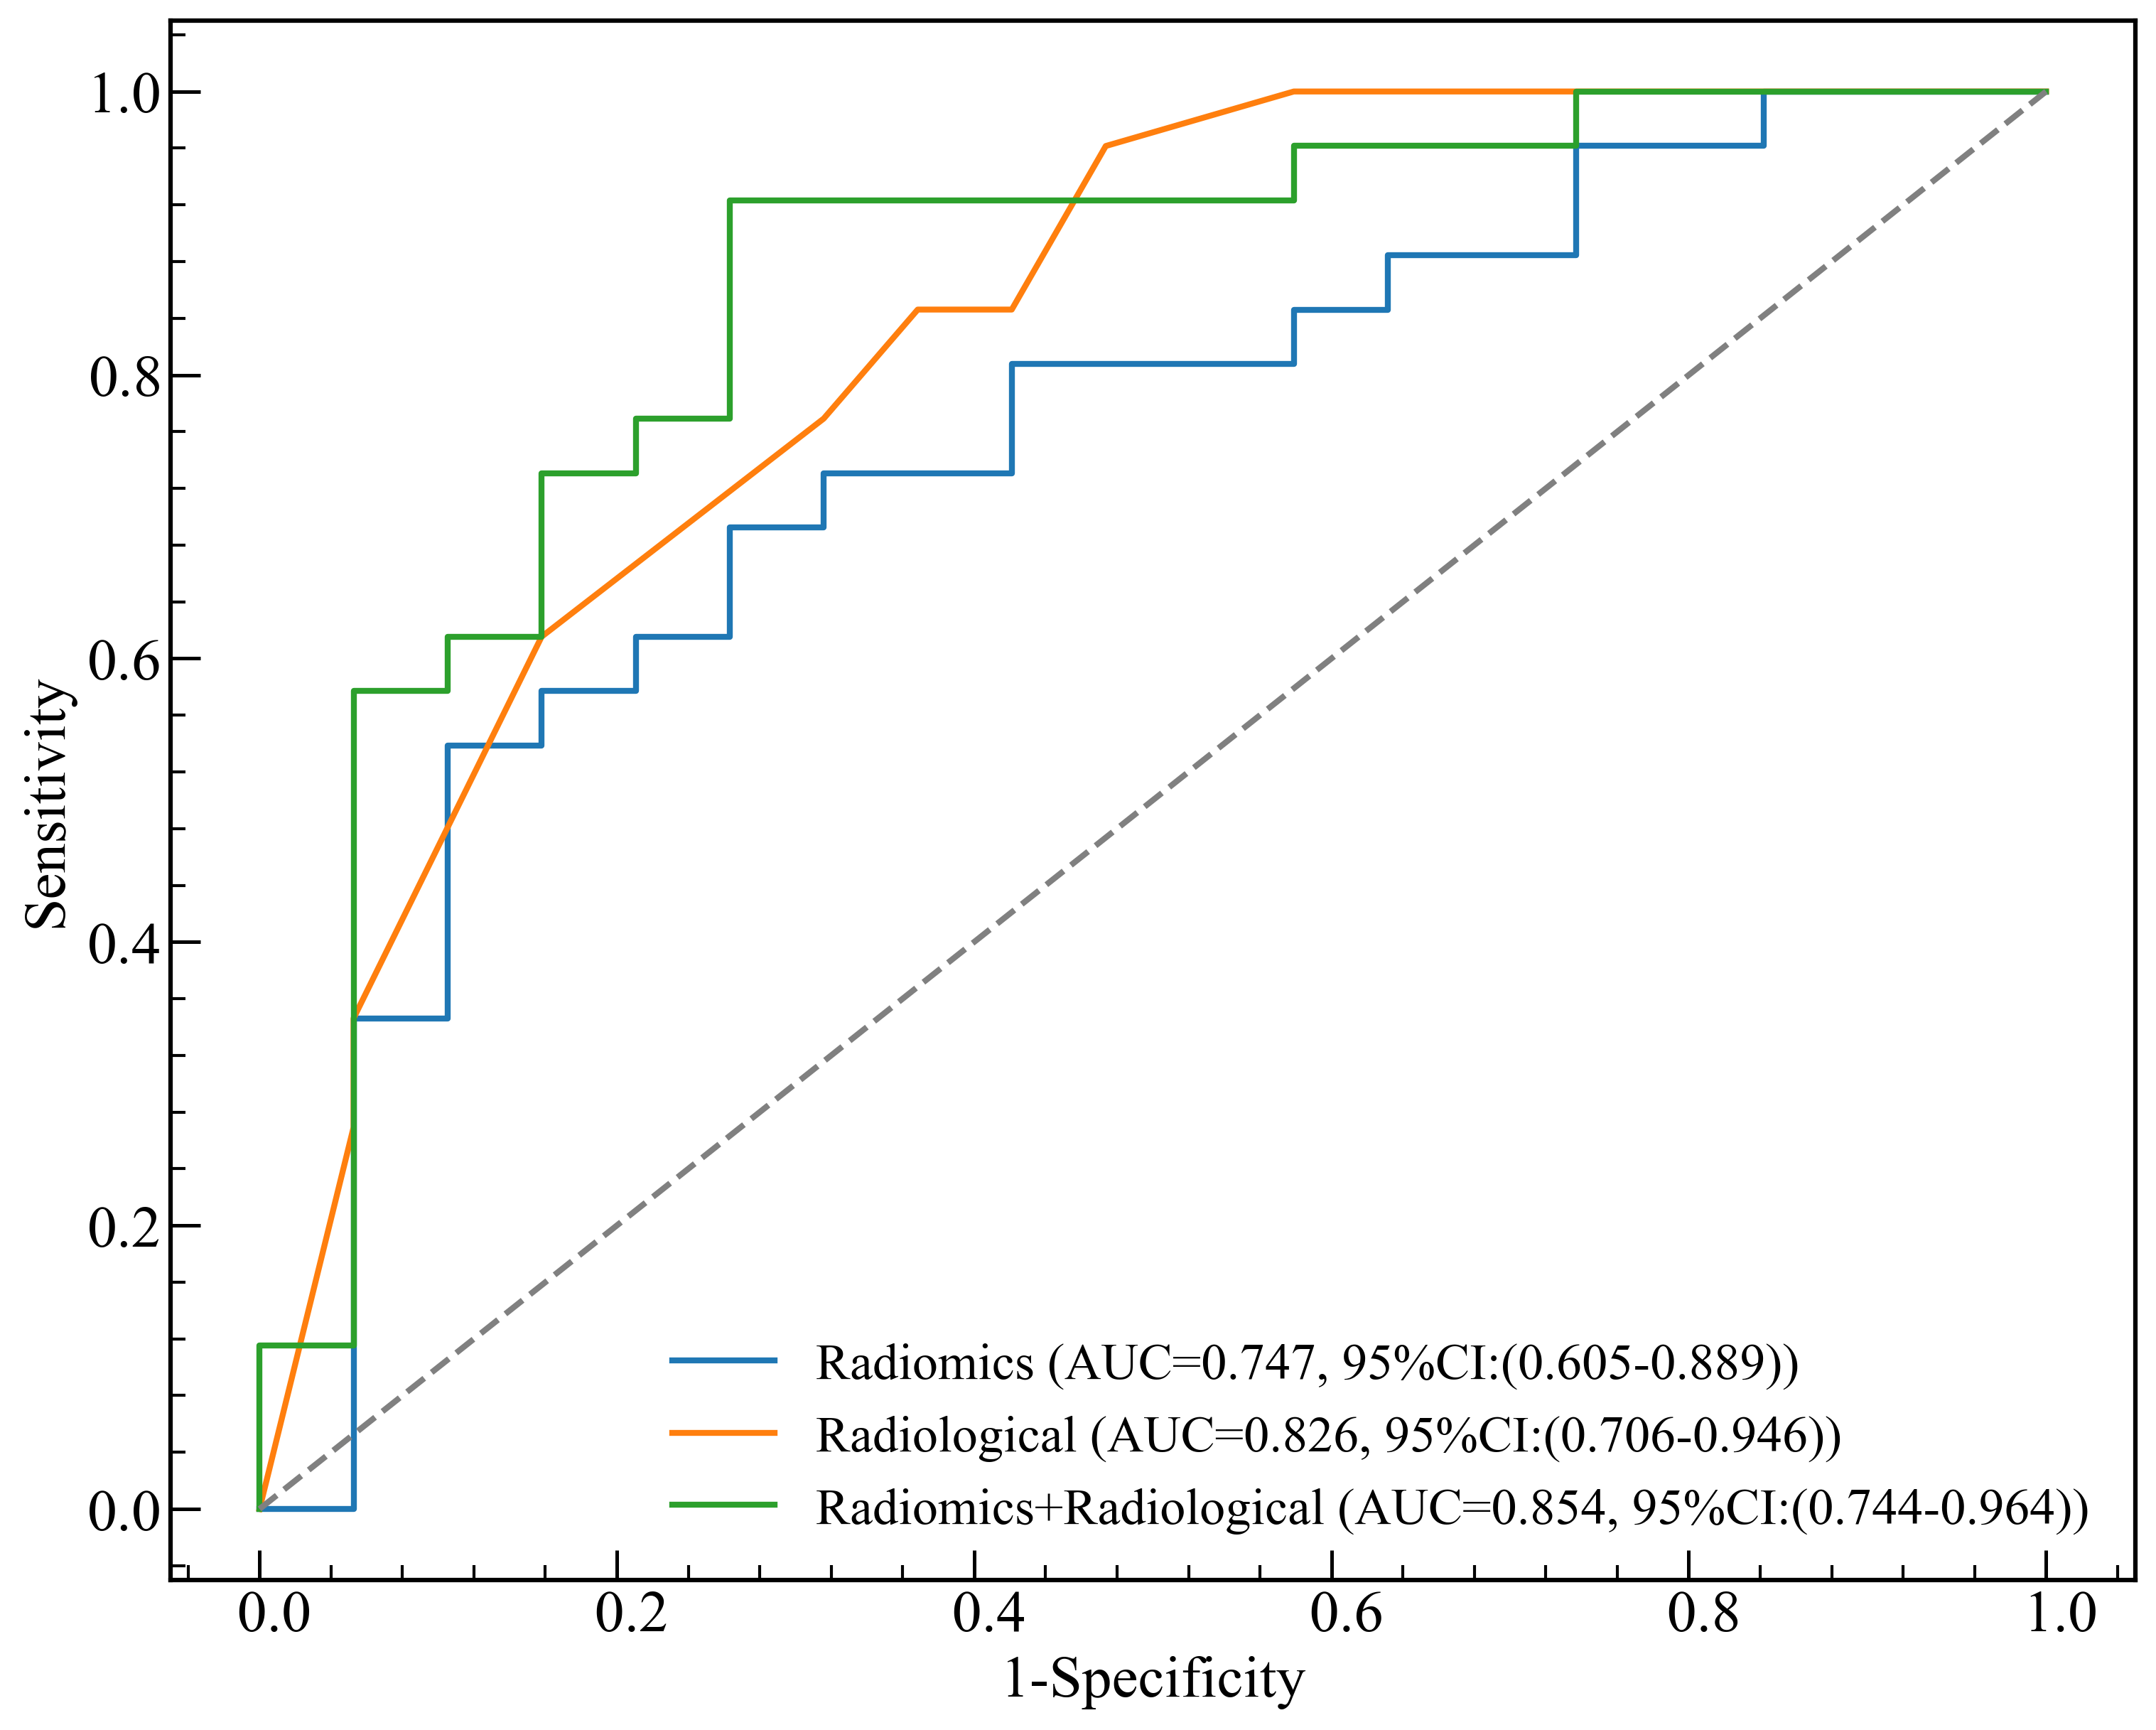

In [169]:
Roc_Auc_Plot(external_results_list, legends=['Radiomics', 'Radiological', 'Radiomics+Radiological'], saved='./roc_external.png')

## Train radiomics

In [171]:
radio_train_df = pd.read_csv('./train.csv')

In [176]:
train_radio_y_score = np.array(radio_train_df['y_score'])
train_radio_y_true = radio_train_df['y_true']
train_radio_thre = ROC_threshold(train_radio_y_true, train_radio_y_score)[0]
train_radio_thre = 0.80755
print(test_thre)

(0.5592936913406085, [0.4166666666666667, 0.8043478260869565])


In [177]:
train_radio_y_pred = train_radio_y_score > radio_thre 

In [178]:
train_radio_results = pd.DataFrame({'y_true':train_radio_y_true, 'y_pred':train_radio_y_pred, 'y_score':train_radio_y_score})

In [179]:
classification_evaluation(train_radio_y_true, train_radio_y_pred, train_radio_y_score)

{'auc': 0.9230769230769231,
 'auc_CI': [0.8825606223251018, 0.9635932238287445],
 'sensitivity(recall)': 0.8942307692307693,
 'specificity': 0.8148148148148148,
 'accuracy': 0.8670886075949367,
 'precision': 0.9029126213592233,
 'f1': 0.8985507246376813}